<a href="https://colab.research.google.com/github/samantha-olinsky/MA322-Python/blob/main/MLR/MLR_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# importing packages we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from scipy import stats

### Extraction

In [35]:
# if we don't wish to use all of the data in a dataframe,
# we can EXTRACT the features we want

# extraction (or subsetting) is the process of
# taking only SOME of the data from a dataframe

In [36]:
# lets take a look at the rent dataset

# first we read it in
rent_df = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/rent.csv')

# then we can preview the dataframe
print(rent_df)

     Unnamed: 0  rent  size
0             1  1730  1390
1             2  1840  1430
2             3  1570  1380
3             4  1720  1440
4             5  1240   980
..          ...   ...   ...
995         996  1180   990
996         997  1610  1320
997         998  1830  1720
998         999  1310  1230
999        1000  1680  1280

[1000 rows x 3 columns]


In [37]:
# you may notice that unnamed feature/column
# it is providing us with the index number of each example/row

# we don't need that information
# since Python gives us the index numbers already
# (just off by one due to index starting at 0 instead of 1)

# let's EXTRACT just the rent and size columns
# create a new variable to store just those 2 features
rent_df2 = rent_df[['rent', 'size']]  

# Notice the double brackets 
# because it's a list WITHIN
# a selection of a subset of the dataframe

print(rent_df2)

     rent  size
0    1730  1390
1    1840  1430
2    1570  1380
3    1720  1440
4    1240   980
..    ...   ...
995  1180   990
996  1610  1320
997  1830  1720
998  1310  1230
999  1680  1280

[1000 rows x 2 columns]


In [38]:
# now, as we see, we have just 2 columns in our new dataframe

In [39]:
# we're going to be using the cosmetic sales dataset
# lets bring it in
cos = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/cosmetic_sales.csv')

In [40]:
# lets take a look
print(cos)

     salesperson  year     month  ... units_sold order_amount  cost
0          Betsy  2004     April  ...          8          288   227
1       Hallagan  2004     March  ...        151          448   320
2         Ashley  2005  February  ...        416          402   347
3       Hallagan  2006       May  ...        202          650   561
4          Zaret  2004      June  ...        167          347   219
...          ...   ...       ...  ...        ...          ...   ...
1886      Ashley  2005  February  ...         95          435   281
1887     Colleen  2005  November  ...        114          514   404
1888       Zaret  2004   January  ...        202          659   546
1889    Hallagan  2006  November  ...        482          410   354
1890    Cristina  2006      June  ...        225          463   382

[1891 rows x 8 columns]


In [41]:
# we can't see all 8 columns from that view...
# lets try info
cos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   salesperson   1891 non-null   object
 1   year          1891 non-null   int64 
 2   month         1891 non-null   object
 3   dept          1891 non-null   object
 4   location      1891 non-null   object
 5   units_sold    1891 non-null   int64 
 6   order_amount  1891 non-null   int64 
 7   cost          1891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 118.3+ KB


In [42]:
# let's extract the 3 QUANTITATIVE variables
# to veiw all the correlations among them
cos2 = cos[['units_sold', 'order_amount', "cost"]]
print(cos2)

      units_sold  order_amount  cost
0              8           288   227
1            151           448   320
2            416           402   347
3            202           650   561
4            167           347   219
...          ...           ...   ...
1886          95           435   281
1887         114           514   404
1888         202           659   546
1889         482           410   354
1890         225           463   382

[1891 rows x 3 columns]


###Correlation Matrix

In [43]:
# now inorder to see all the correlations
# we are going to create a CORRELATION MATRIX
# use a 
print(cos2.corr())

              units_sold  order_amount      cost
units_sold      1.000000      0.422342  0.442345
order_amount    0.422342      1.000000  0.948035
cost            0.442345      0.948035  1.000000


###Scatterplot Matrix

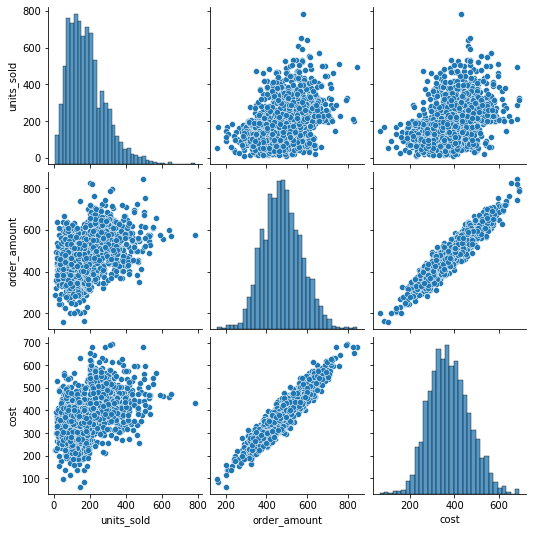

In [48]:
# to visualize all of the scatterplots in a matrix,
# we're going to import another package
import seaborn as sns

# from seaborn (sns) were using the pairplot method
print(sns.pairplot(cos2))

# to focus on just the lower left corner,
# aka remove the duploicates
# print(sns.pairplot(cos2, corner=True))

# this function also provides histograms as the diagonals
# if you want to remove them as well,
# print(sns.pairplot(cos2, corner=True, diag_kind='none'))

### *Multiple* Linear Regression: **MLR**

In [50]:
pies = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/piesales.csv')
print(pies)

    Pie_Sales  Price  Advertising Holiday
0         350    5.5          3.3      no
1         460    7.5          3.3     yes
2         350    8.0          3.0      no
3         430    8.0          4.5     yes
4         350    6.8          3.0      no
5         380    7.5          4.0      no
6         430    4.5          3.0      no
7         470    6.4          3.7     yes
8         450    7.0          3.5     yes
9         490    5.0          4.0     yes
10        340    7.2          3.5      no
11        300    7.9          3.2      no
12        440    5.9          4.0     yes
13        450    5.0          3.5     yes
14        300    7.0          2.7      no


In [52]:
# so for our MULTIPLE linear regression
# were going to be using more than 1 independent variable
X = pies[['Price', 'Advertising']]
# notice the double brackets?
# list WITHIN a selection

# and lets set our dependent var/target feature
Y = pies['Pie_Sales']

# fit the model
model = linear_model.LinearRegression().fit(X,Y)

print('Intercept:',model.intercept_)
print("Coef's:", model.coef_)

Intercept: 306.5261932837436
Coef's: [-24.97508952  74.13095749]


**So:**

Pie_Sales<sub>hat</sub> = 306.526 – 24.975(Price) + 74.131(Advertising)

In [55]:
# lets make predictions!!!
print("Pie price of $5.50, and advertising of $350, predicts pie sales of:", model.predict([[5.5,3.5]]))
print("Pie price of $6.00, and advertising of $320, predicts pie sales of:", model.predict([[6,3.2]]))

Pie price of $5.50, and advertising of $350, predicts pie sales of: [428.62155215]
Pie price of $6.00, and advertising of $320, predicts pie sales of: [393.89472014]


In [56]:
# calculating R^2

# let's store all the predictions, using the actual data, as a variable
pie_sales_predictions = model.predict(pies[['Price', 'Advertising']])

# putting the parameters into the function
print(metrics.r2_score(pies['Pie_Sales'], pie_sales_predictions))

0.5214779360292288


### **Additional MLR Example:** Sales, Radio, and Newspaper Ads

In [ ]:
# load in the dataset to a dataframe
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_oNaK_QKTtFQYdh7Pl17_prektSRuDVwRD71Vo8daBd0biyeG-Oiic4dMN_EL--voDWHAc5MmXNYH/pub?gid=0&single=true&output=csv')

In [ ]:
print(df)

As a result of the above, the dataframe `df` has the `sales`, `radio`, and
`newspaper` Ads data loaded in.

Lets look at the correlation coefficient, r , and the scatterplot for Newspaper and Sales.


In [ ]:
# calculate the correlation coefficient, r , (and the p-value)
print(stats.pearsonr(df['newspaper'], df['sales']))

In [ ]:
# labeled scatterplot
plt.scatter(df['newspaper'], df['sales'])
plt.xlabel("Newspaper Ad Spending ($000)")
plt.ylabel("Sales in Dollars ($000)")
plt.title("Newspaper Expenditures and Sales")

Now lets look at the correlation coefficient, r , and the scatter plot for ***Radio*** and Sales.


In [ ]:
# calculate the correlation coefficient, r , (and the p-value)
print(stats.pearsonr(df['radio'], df['sales']))

In [ ]:
# labeled scatterplot
plt.scatter(df['radio'], df['sales'])
plt.xlabel("Radio Ad Spending ($000)")
plt.ylabel("Sales in Dollars ($000)")
plt.title("Radio Ad Expenditures and Sales")

In [ ]:
# correlation matrix
print(df.corr())

In [ ]:
# scatterplot matrix
import seaborn as sns
print(sns.pairplot(df))

In [ ]:
# only view the bottom left corner
print(sns.pairplot(df, corner=True))

In [ ]:
# run the regression model
X = df[['newspaper', 'radio']]
Y = df['sales']
model = linear_model.LinearRegression().fit(X,Y)

print('Intercept:',model.intercept_)
print("Coef's:", model.coef_)

In [ ]:
# therefore in context,
# sales_hat = 156.43 + 16.80*(newspaper) + 13.08*(radio)

In [ ]:
# making predictions
print("Spending 30,000 on Radio ads and 35,000 on Newspaper predicts sales of:", model.predict([[30,35]]))
print("Spending 35,000 on Radio ads and 45,000 on Newspaper predicts sales of:", model.predict([[35,45]]))

In [ ]:
# calculate R^2

# storing all the predictions for the all the sizes as a variable
sales_predictions = model.predict(df[['newspaper', 'radio']])

# putting the parameters into the function
print(metrics.r2_score(df['sales'], sales_predictions))